# Japanese Similarity Analysis
Auth: Harrison Loh

## Abstract
asdf

## Introduction
Immersion learning is a method of foreign language learning (also called acquisition) which emphasizes the learning of a foreign language using native content in the language as the primary study material.
For Japanese, one source of content for use in immersion learning is anime.
Different methods and approaches for using anime to learn the Japanese language have been presented on different internet sites and platforms, one example being AJATT (All Japanese All The Time) [[1](https://tatsumoto-ren.github.io/blog/whats-ajatt.html)] and its various adaptations and modifications.

One source of information relating to tips, strategies, and tools for applying an AJATT style approach to Japanese learning using Anime is a YouTube channel called Matt vs Japan [[2](https://www.youtube.com/@mattvsjapan)].
One idea that has been presented by MattvsJapan, as well as on the Refold language learning guide is the idea of language "domains", or genres of content which have a specific subset of language that is commonly used (e.g. fantasy vs. crime drama vs. slice-of-life) [[3](https://refold.la/simplified/stage-2/b/immersion-guide)].
By focusing on a single domain, words unique to a domain can be encountered more frequency, thus increasing the chance of acquiring them for long term retention.
The aquisition of words has been deemed as highly important for learning a language, such as by Steve Kaufmann (one of the founders of LingQ) [[4](https://www.youtube.com/@Thelinguist)][[5](https://www.lingq.com/en/)].
Therefore, focusing on a single domain when immersing is an attractive strategy for quickly aquiring foreign language vocabulary.

One idea to determine the domain of a show/piece of content is by the genre of the media (e.g. slice-of-life).
While this seems to be a sensible categorization of media into language domains, the question remains (at least to me) whether shows within a single genre quantitatively have a higher language similarity than shows across different tagged genres.

The aim of this repo is to provide an analysis of the language content from different anime shows to quantify the degree of similarity in the language used.
The objectives are as follows:
- Develope criteria for comparing the similarity of the language present between any two shows.
- Identify and differentiate between "core language" and "domain language".
- Compare the degree of similarity of the language of shows in a single genre compared to shows across genres.

References:
- [1] https://tatsumoto-ren.github.io/blog/whats-ajatt.html
- [2] https://www.youtube.com/@mattvsjapan
- [3] https://refold.la/simplified/stage-2/b/immersion-guide
- [4] https://www.youtube.com/@Thelinguist
- [5] https://www.lingq.com/en/

## Methods
### Dataset description
The subtitles for 89 shows were obtained as the dataset for analysis.
Subtitle files were downloaded from Kitsunekko.net under the Japanese subtitles page (https://kitsunekko.net/).
For analysis, SRT subtitle files were solely used.
For any shows with subtitles in the ASS format, conversion of these files to SRT was done using the subtitle tool Aegisub (https://aegisub.org/) by exporting as SRT files after choosing the "clean tags" option in the export window.
The genres for the chosen shows were taken from the information present in their respective listings on MyAnimeList (https://myanimelist.net).
A complete list of all the shows used with their genres and additional information is included in the "show_genres.xlsx" spreadsheet.
The distribution of genres for the shows is as follow:

- Action: 33
- Drama: 26
- Fantasy: 21
- Sci-Fi: 18
- Mystery: 17
- Romance: 15
- Adventure: 12
- Comedy: 12
- Sports: 11
- Supernatural: 10
- Slice of Life: 10
- Suspense: 7
- Ecchi: 2
- Avant Garde: 1

Given that the Ecchi and Avant Garde genre only show up a small number of times, these two categories are excluded from the analysis.

### Lemma Extraction
For quantifying the similarity between two or more selections of japanese text, the first step done is breaking the entire text into the component lemmas.
In linguistics, lemmas are the "dictionary form" of a word, and can be thought of as the 'base' form.
For example, in English the words _break_, _broke_, _broken_, and _breaking_ all share the same lemma: **break** (See [Wiki](https://en.wikipedia.org/wiki/Lemma_(morphology))).
For a similarity analysis between two bodies of text, I am more interested in whether unique words are shared between shows, not whether the same forms of a word are shared.
In other words, whether the base word 'to go' (行く) is shared, and not whether specific conjugations (such as 行きます, 行きません) are shared.
Therefore, the lemmas present in a block of Japanese text are chosen as the components for further comparison.

To give an example, consider the following 4 sentences, each with one additional change to the words used compared to the original, first sentence:
- original: "私の友達は親切な人です"
- one change: "彼の友達は親切な人です"
- two changes: "彼の彼女は親切な人です"
- three changes: "彼の彼女は内気な人です"

With each sentence, the content becomes more distinct from the original sentence.

Using the fugashi package with the Tagger class, we can extract the lemmas present in each of the above sentences.

In [1]:
"""
Lemma extraction from text using fugashi
"""
from fugashi import Tagger

def lemma_extract(text):
    """
    Short function for returning a list of words and a list of the lemmas
    """
    words = tagger(text)

    lemma_list = []
    for word in words:
        lemma_list.append(word.feature.lemma)

    return words, lemma_list


tagger = Tagger('-Owakati')

orig_sent = "私の友達は親切な人です"  # base sentence for comparison
sent_1diff = "彼の友達は親切な人です"  # one word difference
sent_2diff = "彼の彼女は親切な人です"  # two words different
sent_3diff = "彼の彼女は内気な人です"  # three words different

text = [orig_sent, sent_1diff, sent_2diff, sent_3diff]

word_list = []
lemma_list = []
for sentence in text:
    words, lemmas = lemma_extract(sentence)

    word_list.append(words)
    lemma_list.append(lemmas)


print(f"Original Sentence: {text[0]}")
print(f"Original lemmas: {lemma_list[0]}\n")
print(f"1 diff Sentence: {text[1]}")
print(f"1 diff lemmas: {lemma_list[1]}\n")
print(f"2 diff Sentence: {text[2]}")
print(f"2 diff lemmas: {lemma_list[2]}\n")
print(f"3 diff Sentence: {text[3]}")
print(f"3 diff lemmas: {lemma_list[3]}\n")

Original Sentence: 私の友達は親切な人です
Original lemmas: ['私-代名詞', 'の', '友達', 'は', '親切', 'だ', '人', 'です']

1 diff Sentence: 彼の友達は親切な人です
1 diff lemmas: ['彼', 'の', '友達', 'は', '親切', 'だ', '人', 'です']

2 diff Sentence: 彼の彼女は親切な人です
2 diff lemmas: ['彼', 'の', '彼女', 'は', '親切', 'だ', '人', 'です']

3 diff Sentence: 彼の彼女は内気な人です
3 diff lemmas: ['彼', 'の', '彼女', 'は', '内気', 'だ', '人', 'です']



### Calculating the Similarity of Lemma sets

For English text, similarity scores between sets of documents or text can be done fairly easily using criteria such as the Term Frequency-Inverse Document Frequency (IF-IDF) and libraries such as scikit with sklearn.
One challenge I faced while trying to set these tools up however was in modifying the workflow from English to Japanese.
While there are a few sites which describe adapting sklearn to Asian languages, specifically using the TfidfVectorizer class with a custom tokenizer (such as [here](https://investigate.ai/text-analysis/how-to-make-scikit-learn-natural-language-processing-work-with-japanese-chinese/)) (which is what I originally wanted to do), I wasn't quite able to figure out how to apply this using the fugashi package which I was more comfortable with using, and so I decided to try a different approach.

In the previous code block, lists of the lemmas present in each of the example sentences were generated.
If the frequency of occurence of each lemma in the sentence is ignored, then each list can be converted into a set, resulting in a collection listing the unique lemmas present in a given text.
From here, methods which quantify the similarity between two sets can be applied to quantify how similar the lemma collection between the sentences are.

The value I am using to evaluate the similarity of sets is the [Jaccard Similarity Coefficient](https://en.wikipedia.org/wiki/Jaccard_index), and is defined as the size of the intersection between two sets divided by the size of the union of the sets.

$$
J(A, B) = \frac{\left| A \cap B \right|}{\left| A \cup B \right|}
$$

where $A$ and $B$ are two sets for comparison.
The calculation is commutative, so order of the sets does not matter.

Setting up calculating the Jaccard Similarity can easily be done in python, as shown [here](https://www.annasguidetopython.com/python3/data%20structures/lists-finding-the-jaccard-similarity-between-two-sets-in-a-list/) and below.

In [2]:
"""
Quantifying the similarity of sentences using Jaccard Similarity on sets of the lemmas present
"""
set1 = set(lemma_list[0])
set2 = set(lemma_list[1])
set3 = set(lemma_list[2])
set4 = set(lemma_list[3])

def jaccard_similar(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))

print(f"1 against 1: {jaccard_similar(set1, set1)}")
print(f"1 against 2: {jaccard_similar(set1, set2)}")
print(f"1 against 3: {jaccard_similar(set1, set3)}")
print(f"1 against 4: {jaccard_similar(set1, set4)}")

1 against 1: 1.0
1 against 2: 0.7777777777777778
1 against 3: 0.6
1 against 4: 0.45454545454545453


As expected, the similarity value for a lemma set compared against itself is 1, meaning the sets are identical.
As each sentence becomes more and more different than the original, the Jaccard coefficient decreases, with a value of ~0.45 for a sentence with 4 changed words from the original.

To recap, in order to compare the similarity of the language used in between two anime shows, the following steps will be done:
- extract a set of the lemmas present within the subtitle files of each show
- calculate the Jaccard Similarity Coefficient between the shows.

## Analysis
In this section, subtitle files for each show in the 'Data' folder will be parsed to create sets of the unique lemmas present, and the Jaccard Similarity between each show is calculated.

### Creating database of lemmas from shows

In [3]:
"""
Creating a database of lemmas by reading in and parsing the subtitles files in the 'data' folder
"""
from fugashi import Tagger
from subtitleparsing import create_lemma_database

data_folder = 'data'  # folder with subtitles
tagger = Tagger('-Owakati')

lemma_database = create_lemma_database(data_folder, tagger)

-- Beginning parse of shows in subtitle folder --

Show currently parsing: 07-ghost
Show currently parsing: 3-gatsu-no-lion
Show currently parsing: 7seeds
Show currently parsing: 91-days
Show currently parsing: acca-13
Show currently parsing: aico-incarnation
Show currently parsing: akebi-chan-no-sailor-fuku
Show currently parsing: amagi-brilliant-park
Show currently parsing: appare-ranman
Show currently parsing: assassination-classroom
Show currently parsing: baby-steps
Show currently parsing: ballroom-e-youkoso
Show currently parsing: banana-fish
Show currently parsing: barakamon
Show currently parsing: blue-lock
Show currently parsing: blue-period
Show currently parsing: bocchi-the-rock
Show currently parsing: boku-no-hero-academia
Show currently parsing: bungo-stray-dogs
Show currently parsing: burn-the-witch
Show currently parsing: chainsaw-man
Show currently parsing: charlotte
Show currently parsing: chihayafuru
Show currently parsing: cider-no-you-ni-kotoba-ga-wakiagaru
Show cur

In [4]:
# Example of the contents of the lemma_database dictionary
print(lemma_database['charlotte'])

{'使う', '夢見る', '着替える', '関係', '寄越す', '登校', '引っ越し', '小', '無償', '発見', '本当', '初め', '自身', 'じゃ', '手早い', '会', '存分', 'バイト-Arbeit', '期', '呼び出す', '秘伝', 'ビザ-visa', '然', '有り難い', 'って', 'っち', 'いたこ', '自己', '助ける', '仕舞う', '弓道', '小さい', 'とろっとろ', '地', '交換', '湯', '石鹸', '時期', '答', 'その', '影響', '良い', 'や', '押し掛ける', '子供', '空', '移動', '友情', '消す', '力', 'なり-断定', '論点', '記事', '際', '犯人', '特定', '不安', '奏でる', '矛盾', '聞こえる', '更に', '得意', '内容', '医者', '見せ所', '否', '咲き', '日差し', '匙', '店', '平気', 'など', 'だらけ', 'こんな', '直後', '付き合う', '阿諛', '肩', '流石', '去る', '巻き込む', '主', '塾生', '釣り合う', '教師', '破廉恥', '詰まる', '勝算', '金', '暗い', '痛い', '正に', 'ぽい', '怒る', '現役', 'ばい', '此奴', '用途', '程度', '仲間', '旋律', '用意', 'ベース-base', 'ワイルド-wild', 'つ', '目', '賢い', 'チーム-team', 'ずつ', '剤', '雨霰', 'ユウ', 'テント-tent', '逃げる', '語る', '僕-代名詞', 'イエス-Iesous', '起こる', '通り', '返す', '只今', '間違える', 'フォー-for', '話し合う', 'ピンチ-pinch ', 'システム-system', '点', '成績', '勉強', '巡る', '任す', '名門', '件', '何事', 'プレー-play', '風邪', '代表', '折る', 'カッター-cutter', 'くそ', '心', '済む', '悪', '試練', '察', '判断', '傾向', '変装', '強い',

### Calculate a similarity matrix between each show

For calculating the Jaccard Similarity, the python calculations were performed the same as shown above using the singular sentence as the example.

Showing an example using the constructed lemma database, let's calculate the similarity between the shows "Hyouka" and "Charlotte" (two random choices).

In [5]:
set1 = lemma_database['charlotte']
set2 = lemma_database['hyouka']

intersection_len = len(set1.intersection(set2))
union_len = len(set1.union(set2))

print(f"Lemmas shared between Charlotte and Hyouka: {set1.intersection(set2)}")
print(f"Total unique lemmas in both shows combined: {set1.union(set2)}")
print(f"Size of intersection set: {intersection_len}")
print(f"Size of union set: {union_len}")
print(f"Jaccard Similarity score: {intersection_len / union_len}") 


Lemmas shared between Charlotte and Hyouka: {'危ない', '使う', '少ない', '関係', '寄越す', 'おー', 'り', '彼', '終わる', '小', 'に', '念', '一瞬', '発見', '本当', '初め', '人生', '作る', '事故', 'ど', '自身', 'じゃ', '次', '至る', '会', '所属', '日曜', '観念', 'ああ', '期', '呼び出す', '探す', '急ぐ', 'てる', '揃う', 'プレーヤー-player', '結局', '然', '探る', 'って', '合う', '迷う', '生徒', '時間', '自己', '繰り返す', '助ける', '仕舞う', '経験', '抜く', '小さい', '行く', '窓', '大事', 'もう', '本', '地', 'メール-mail', '最後', 'ぜ', '全員', '返る', 'テーブル-table', '彼氏', '妥当', '湯', '始まる', '馬鹿', 'まさか', '時期', '丸で', '終了', '有る', '分かれる', '場面', '安心', '影響', '処分', 'リーダー-leader', '生', '良い', '直ぐ', 'や', '御陰', 'トップ-top', '子供', '揺れる', '物', '渡す', '姿', '体調', 'っ', '度', '移動', '旨い', '大丈夫', '消す', '因る', '厄介', '力', 'なり-断定', '臭い', '記事', '際', '犯人', '特定', '面倒', '兄弟', '全部', '似合い', '風呂', '確実', '負ける', '矛盾', '後', '御座る', '一番', '巻く', '聞こえる', '格好', '注意', '引く-他動詞', '更に', '簡単', '承諾', 'あの', '得意', '内容', '決める', '回る', '丁度', '凄い', '気持ち', '否', '内', '回答', '最初', '逮捕', '予算', '頑張る', '思い出す', '園', '振り', 'オカルト-occult', '誘う', 'えー', '頼む', '病気', '店', '難い', '思

The intersection shows all the lemmas which are shared between the two shows, while the union shows the total list of unique lemmas from both shows combined.

Calculating the Jaccard Similarity between all show combinations gives the following:

In [6]:
from itertools import product  # for helping iterate through the shows
import numpy as np

# Get number of shows
num_shows = len(lemma_database)

similarity_matrix = np.zeros((num_shows, num_shows))  # zero matrix for over-writing with values

# Calculate Jaccard similarity, also create index of show names for future reference
def jaccard_similar(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))


show_list = []
for key in lemma_database:
    show_list.append(key)  # add key to show list


for i,j in product(range(num_shows), range(num_shows)):
    jaccard_value = jaccard_similar(lemma_database[show_list[i]], lemma_database[show_list[j]])
    similarity_matrix[i, j] = jaccard_value


# Printing the similarity matrix for initial inspection.
print(similarity_matrix)

[[1.         0.24229313 0.26137398 ... 0.28415147 0.24545766 0.22303427]
 [0.24229313 1.         0.27148704 ... 0.23552932 0.30041094 0.24452622]
 [0.26137398 0.27148704 1.         ... 0.27522936 0.26776752 0.23416856]
 ...
 [0.28415147 0.23552932 0.27522936 ... 1.         0.2360886  0.23159934]
 [0.24545766 0.30041094 0.26776752 ... 0.2360886  1.         0.22180387]
 [0.22303427 0.24452622 0.23416856 ... 0.23159934 0.22180387 1.        ]]


As expected the matrix has a diagonal of 1's and is diagonally symmetric.

(The next code section is a quick check to make sure I can reliably retrieve the right similarity score between any two show names, as well as confirm the similarity value is as it should be)

In [7]:
# Two shows I want to compare
show1 = 'baby-steps'
show2 = 'banana-fish'

# Get index value from show list using index()
index1 = show_list.index(show1)
index2 = show_list.index(show2)

# For manual calculating similarity
set1 = lemma_database[show1]
set2 = lemma_database[show2]

intersection_len = len(set1.intersection(set2))
union_len = len(set1.union(set2))

# Print results
print(f"Lemmas shared between {show1} and {show2}: {set1.intersection(set2)}")
print(f"Total unique lemmas in both shows combined: {set1.union(set2)}")
print(f"Size of intersection set: {intersection_len}")
print(f"Size of union set: {union_len}")
print(f"Jaccard Similarity score: {intersection_len / union_len}") 
print(f"Check with similarity_matrix: {similarity_matrix[index1][index2]}")
print(f"Same value: {intersection_len / union_len == similarity_matrix[index1][index2]}")

Lemmas shared between baby-steps and banana-fish: {'使う', '着替える', '関係', '小', '発見', '本当', '自身', 'じゃ', 'あは', '会', '真似', '期', '突く', '然', '有り難い', 'って', '機会', '助ける', '曲がる', '仕舞う', '小さい', '地', '一目', '漁る', '先生', '借りる', '多分', '影響', '良い', 'や', '子供', '移動', '消す', '力', 'なり-断定', '一応', '際', '真っ直ぐ', '不安', '聞こえる', '更に', '得意', 'ウイーク-week', '医者', '否', '染みる', 'くっ', '今年', '感情', '指示', '店', 'だらけ', 'など', 'こんな', '右', '必ず', '付き合う', '肩', '流石', '陥る', 'いで', '詰まる', '勝算', '金', '痛い', '正に', 'ぽい', '完璧', '怒る', '此奴', '程度', 'サイド-side', '用意', 'つ', '目', 'ずつ', '惚れる', '縮める', '逃げる', '僕-代名詞', '痛', '選択', 'ゴー-go', '起こる', '手首', '通り', '予定', '返す', 'ピンチ-pinch ', '点', '勉強', '経つ', '刺激', 'くそ', '集中', '取り返す', 'ブロック-block', '途中', '差し入れ', '心', '悪', '封ずる', '済む', '判断', 'あさって', '対', '強い', '一時', '大体', '順調', '仕舞い', 'せ', '足', '新しい', '見付ける', '性', 'らしい', 'ケース-case', '漸と', '一人', '単なる', '強靭', '針', '高い', '施設', 'ぴったり', '頼り', '成功', '除く', '行動', '違い', '生き生き', '型', 'ちゃん', '唯一', '掛ける', '運転', '後ろ', '準備', '負う', '然し', '果てる', 'さん', 'インタビュー-interview', 'セット-set'

The next step is to compare the similarity scores within and across a genre.

In [8]:
# Group each show by genre
action = [
    'boku-no-hero-academia',
    'lycoris-recoil',
    'vinland-saga',
    'banana-fish',
    'peachboy-riverside',
    'tales-of-zestiria-the-x',
    'great-pretender',
    'deca-dence',
    'assassination-classroom',
    '91-days',
    'standing-on-a-million-lives',
    'eighty-six',
    'iron-blooded-orphans',
    'no-guns-life',
    '07-ghost',
    'burn-the-witch',
    'chainsaw-man',
    'jujutsu-kaisen',
    'k-return-of-kings',
    'maou-gakuin-no-futekigousha',
    'vanitas-no-karte',
    'plunderer',
    'fire-force',
    'takt-op-destiny',
    'princess-principal',
    'psycho-pass',
    'bungo-stray-dogs',
    'gleipnir',
    'aico-incarnation',
    'ssss-dynazenon',
    'suisei-no-majo',
    'vivy-flourite-eyes-song',
    'sirius-the-jaeger',
    'boku-no-hero-academia'
]

drama = [
    'vinland-saga',
    'banana-fish',
    '91-days',
    'standing-on-a-million-lives',
    'eighty-six',
    'iron-blooded-orphans',
    'no-guns-life',
    '7seeds',
    'mawaru-penguindrum',
    'shirobako',
    'kabukichou-sherlock',
    '3-gatsu-no-lion',
    'blue-period',
    'charlotte',
    'hibike-euphonium',
    'violet-evergarden',
    'acca-13',
    'mahoutsukai-no-yome',
    'nagi-no-asukara',
    'relife',
    'sukitte-ii-na-yo',
    'planetes',
    'fruits-basket',
    'chihayafuru',
    'giant-killing',
    'kaze-ga-tsuyoku-fuiteiru'
]

fantasy = [
    'peachboy-riverside',
    'tales-of-zestiria-the-x',
    'standing-on-a-million-lives',
    '07-ghost',
    'burn-the-witch',
    'chainsaw-man',
    'jujutsu-kaisen',
    'k-return-of-kings',
    'maou-gakuin-no-futekigousha',
    'vanitas-no-karte',
    'plunderer',
    'fire-force',
    'takt-op-destiny',
    'drifting-dragons',
    'amagi-brilliant-park',
    'violet-evergarden',
    'acca-13',
    'mahoutsukai-no-yome',
    'nagi-no-asukara',
    'yakusoku-no-neverland',
    'kobayashi-san-dragon-maid'
]

scifi = [
    'deca-dence',
    'eighty-six',
    'iron-blooded-orphans',
    'no-guns-life',
    'fire-force',
    'takt-op-destiny',
    'psycho-pass',
    'aico-incarnation',
    'ssss-dynazenon',
    'suisei-no-majo',
    'vivy-flourite-eyes-song',
    'dr-stone',
    '7seeds',
    'orbital-children',
    'planetes',
    'yakusoku-no-neverland',
    'id-invaded',
    'megalobox'
]

mystery = [
    'great-pretender',
    'vanitas-no-karte',
    'princess-principal',
    'psycho-pass',
    'bungo-stray-dogs',
    'gleipnir',
    '7seeds',
    'mushishi',
    'mawaru-penguindrum',
    'kabukichou-sherlock',
    'tantei-wa-mou-shindeiru',
    'acca-13',
    'yakusoku-no-neverland',
    'fugou-keiji',
    'id-invaded',
    'hyouka',
    'summer-time-rendering'
]

romance = [
    'plunderer',
    'magic-kaito-1412',
    '7seeds',
    'tantei-wa-mou-shindeiru',
    'tonari-no-kaibutsu-kun',
    'mahoutsukai-no-yome',
    'nagi-no-asukara',
    'relife',
    'sukitte-ii-na-yo',
    'planetes',
    'fruits-basket',
    'cider-no-you-ni-kotoba-ga-wakiagaru',
    'horimiya',
    'wotaku-ni-koi-wa-muzukashii',
    'tamako-love-story'
]

adventure = [
    'vinland-saga',
    'banana-fish',
    'peachboy-riverside',
    'tales-of-zestiria-the-x',
    'great-pretender',
    'deca-dence',
    'magic-kaito-1412',
    'dr-stone',
    '7seeds',
    'drifting-dragons',
    'mushishi',
    'orbital-children'
]

comedy = [
    'assassination-classroom',
    'magic-kaito-1412',
    'dr-stone',
    'appare-ranman',
    'bocchi-the-rock',
    'sayounara-zetsubou-sensei',
    'shirobako',
    'kabukichou-sherlock',
    'amagi-brilliant-park',
    'tantei-wa-mou-shindeiru',
    'tonari-no-kaibutsu-kun',
    'paripi-koumei'
]

sports = [
    'chihayafuru',
    'giant-killing',
    'kaze-ga-tsuyoku-fuiteiru',
    'megalobox',
    'baby-steps',
    'ballroom-e-youkoso',
    'blue-lock',
    'free',
    'kuroko-no-basket',
    'yowamushi-pedal',
    'haikyuu'
]

supernatural = [
    'bungo-stray-dogs',
    'gleipnir',
    'sirius-the-jaeger',
    'mushishi',
    'mawaru-penguindrum',
    'paripi-koumei',
    'fruits-basket',
    'summer-time-rendering',
    'flying-witch',
    'death-note'
]

slice_of_life = [
    'mushishi',
    'kobayashi-san-dragon-maid',
    'hyouka',
    'tamako-love-story',
    'barakamon',
    'usagi-drop',
    'yuru-camp',
    'tanaka-kun-wa-itsumo-kedaruge',
    'akebi-chan-no-sailor-fuku',
    'flying-witch'
]

suspense = [
    'banana-fish',
    'psycho-pass',
    'vivy-flourite-eyes-song',
    'yakusoku-no-neverland',
    'id-invaded',
    'summer-time-rendering',
    'death-note'
]

In [14]:
import numpy as np

# Pull the similarity values between the shows within the given category
def ave_similarity_in_category(genre):
    scores = []
    for i,j in product(genre, genre):
        # Two shows I want to compare
        if i == j:  # skipping comparing the same show with itself
            continue

        show1 = i
        show2 = j

        # Get index value from show list using index()
        index1 = show_list.index(show1)
        index2 = show_list.index(show2)

        similarity_score = similarity_matrix[index1][index2]

        scores.append(similarity_score)

    ave_score = np.average(scores)
    std_score = np.std(scores)

    return ave_score, std_score


# Calculate similarity average and std for genre groups
action_similarity, action_std = ave_similarity_in_category(action)
drama_similarity, drama_std = ave_similarity_in_category(drama)
fantasy_similarity, fantasy_std = ave_similarity_in_category(fantasy)
scifi_similarity, scifi_std = ave_similarity_in_category(scifi)
mystery_similarity, mystery_std = ave_similarity_in_category(mystery)
romance_similarity, romance_std = ave_similarity_in_category(romance)
adventure_similarity, adventure_std = ave_similarity_in_category(adventure)
comedy_similarity, comedy_std = ave_similarity_in_category(comedy)
sports_similarity, sports_std = ave_similarity_in_category(sports)
supernatural_similarity, supernatural_std = ave_similarity_in_category(supernatural)
sliceoflife_similarity, sliceoflife_std = ave_similarity_in_category(slice_of_life)
suspense_similarity, suspense_std = ave_similarity_in_category(suspense)

print("action", action_similarity, action_std)
print("drama", drama_similarity, drama_std)
print("fantasy", fantasy_similarity, fantasy_std)
print("scifi", scifi_similarity, scifi_std)
print("mystery", mystery_similarity, mystery_std)
print("romance", romance_similarity, romance_std)
print("adventure", adventure_similarity, adventure_std)
print("comendy", comedy_similarity, comedy_std)
print("sports", sports_similarity, sports_std)
print("supernatural", supernatural_similarity, supernatural_std)
print("sliceoflife", sliceoflife_similarity, sliceoflife_std)
print("suspense", suspense_similarity, suspense_std)

action 0.25993091155915965 0.02764641034230513
drama 0.25888217283903986 0.020494401296925153
fantasy 0.2606385948444497 0.0270989876746294
scifi 0.26588791024586056 0.0186657274267775
mystery 0.26670108916752977 0.016440911447424728
romance 0.2547127823803398 0.04662966186115912
adventure 0.25733243346533446 0.017777538303494284
comendy 0.2590448805230785 0.020482292730576838
sports 0.2812053015920137 0.028389325170528213
supernatural 0.2631699857473756 0.018050900410698494
sliceoflife 0.24230600162363863 0.027332606869014144
suspense 0.26769059664580636 0.015495259876131788


(-0.5, 11.5)

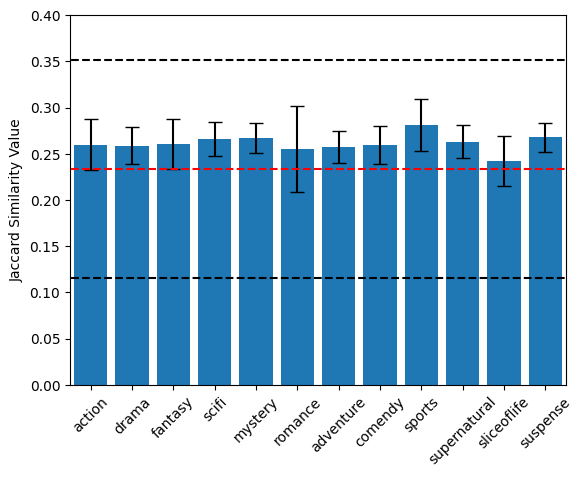

In [16]:
# Plotting the similarity values by genre
import matplotlib.pyplot as plt

data = {
        'action':action_similarity,
        'drama':drama_similarity,
        'fantasy':fantasy_similarity,
        'scifi':scifi_similarity,
        'mystery':mystery_similarity,
        'romance':romance_similarity,
        'adventure':adventure_similarity,
        'comendy':comedy_similarity,
        'sports':sports_similarity,
        'supernatural':supernatural_similarity,
        'sliceoflife':sliceoflife_similarity,
        'suspense':suspense_similarity
        }

std = {
        'action':action_std,
        'drama':drama_std,
        'fantasy':fantasy_std,
        'scifi':scifi_std,
        'mystery':mystery_std,
        'romance':romance_std,
        'adventure':adventure_std,
        'comendy':comedy_std,
        'sports':sports_std,
        'supernatural':supernatural_std,
        'sliceoflife':sliceoflife_std,
        'suspense':suspense_std
}

genres = list(data.keys())
values = list(data.values())
std = list(std.values())

# getting max and min values in similarity matrix for comparison plotting
x = []
for i,j in product(range(num_shows), range(num_shows)):
        if i == j:
                continue
        
        x.append(similarity_matrix[i][j])

max = np.max(x)
min = np.min(x)

# Plotting
fig = plt.figure()
plt.bar(genres, values)
plt.errorbar(genres, values, std, fmt='none', ecolor='black', capsize=5)
plt.hlines(max, -1, 12, 'black', linestyle='--')
plt.hlines((max + min)/2, -1, 12, 'red', linestyle='--')
plt.hlines(min, -1, 12, 'black', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel("Jaccard Similarity Value")
plt.ylim((0, 0.40))
plt.xlim((-0.5,11.5))

In [20]:
# Getting the shows and similarity scores in increasing to decreasing order
for i in range(num_shows):
        for j in range(num_shows):
                if i == j:
                        continue

                if i > j:
                        continue
        
                show1 = show_list[i]
                show2 = show_list[j]

                similarity_score = similarity_matrix[i][j]

                print(show1, show2, similarity_score)


07-ghost 3-gatsu-no-lion 0.24229313142239048
07-ghost 7seeds 0.2613739763421292
07-ghost 91-days 0.2741714598740071
07-ghost acca-13 0.2745054456545899
07-ghost aico-incarnation 0.25626477541371157
07-ghost akebi-chan-no-sailor-fuku 0.2282445046672689
07-ghost amagi-brilliant-park 0.2667251590261022
07-ghost appare-ranman 0.2736511008952335
07-ghost assassination-classroom 0.25885047896709706
07-ghost baby-steps 0.2572347266881029
07-ghost ballroom-e-youkoso 0.24443280062876604
07-ghost banana-fish 0.264196675900277
07-ghost barakamon 0.2591240875912409
07-ghost blue-lock 0.2420997649516845
07-ghost blue-period 0.2489645651173493
07-ghost bocchi-the-rock 0.24758046365068648
07-ghost boku-no-hero-academia 0.24036237471087124
07-ghost bungo-stray-dogs 0.2713536201469045
07-ghost burn-the-witch 0.20437956204379562
07-ghost chainsaw-man 0.25689819219790677
07-ghost charlotte 0.27061079156395507
07-ghost chihayafuru 0.24190554753557433
07-ghost cider-no-you-ni-kotoba-ga-wakiagaru 0.17081604

The above printed list was copied into excel and sorted based on the similarity score.

The resulting list is shown in the "Similarity scores for show pairs.xlsx" file.

## Results and Discussion
Looking at the sorted list in the "Similarity scores for show pairs.xlsx" file, the max Jaccard Similarity score amongst the show pairs calculated is 0.351, with the minimum score 0.115.
The max similarity score of 0.351 was achieved for "Baby Steps" and "Kuroko no Basket", which are both sports shows.
The min similarity score of 0.115 is for the pair of "Banana Fish" and "Words bubble up like soda pop" (or Cidar no You ni Kotoba ga Wakiagaru).
This is sensible for these two shows, as Banana Fish takes places in a gritty New York City dealing with gangs and drug conspiracies, while Cidar no You takes place in Japan, is of a much lighter atmosphere, and is a slice of life rom-com involving a young boy and girl who have different insecurities they are dealing with.

Looking at the highest similarity score shows, the fact they are both sports shows helps support the idea of similar genres having similar language.

Using 0.30 as a little bit of arbitrary cutoff for "similar" shows, there are 74 shows which have a similarity score greater than 0.30.

## Conclusion
asdf